<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Worksheets/8_2_Correlation_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively
---
This worksheet has a set of exercises for practising using the linregress function.  The function will run a linear regression algorithm (or model) to produce data that can be used for predictions.

### Exercise 1 - Clean the data 
---
Using the positive psychology dataset - "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
* Read the data and display info 
* Visually check the summary to see which columns have null values
* Remove columns with a significant number of null values

**Expected Output**
```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          44 non-null     int64  
 1   English      44 non-null     object 
 2   sex          44 non-null     object 
 3   origin       44 non-null     object 
 4   Ukresidence  44 non-null     float64
 5   MAAS         44 non-null     float64
 6   Resilliance  44 non-null     int64  
 7   Wellbeing    44 non-null     int64  
 8   Stress       44 non-null     int64  
 9   selfesteem   44 non-null     int64  
 10  LoC          44 non-null     int64  
 11  sleep        44 non-null     int64  
 12  Year         44 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB
```

In [109]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats.stats import pearsonr

def get_csv_data(url):
  df = pd.read_csv(url)
  return df  

url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"
psych_data = get_csv_data(url)

psych_v1 = psych_data.drop(['firstlanguage'], axis=1)

print(psych_v1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          44 non-null     int64  
 1   English      44 non-null     object 
 2   sex          44 non-null     object 
 3   origin       44 non-null     object 
 4   Ukresidence  44 non-null     float64
 5   MAAS         44 non-null     float64
 6   Resilliance  44 non-null     int64  
 7   Wellbeing    44 non-null     int64  
 8   Stress       44 non-null     int64  
 9   selfesteem   44 non-null     int64  
 10  LoC          44 non-null     int64  
 11  sleep        44 non-null     int64  
 12  Year         44 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.6+ KB
None


### Exercise 2 - Check for outliers 
---
We briefly mentioned outliers in the R and stats presentation. An outlier is an abnormal value in the data that is either extremely high or low compared to the rest of the data. Outliers can skew results. 

A value is considered to be an outlier if it is any of:
*  greater than `Q3 + 1.5 * interquartile_range`
*  less than `Q1 - 1.5 * interquartile_range`
*  more than 2 standard deviations from the mean

Q3 = value at 75% of data, Q1 = value at 25% of the data, IQR is the interquartile range, the difference between Q3 and Q1.  

We can check for outliers using a Box plot, in which:

*  the upper line on the boxplots arm (whisker) is `Q3 + 1.5 * IQR`
*  the lower line on the boxplots arm (whisker) is `Q1 - 1.5 * IQR`
*  the middle line of the box is the median
*  the top of the box is Q3
*  the bottom of the box is Q1
*  outliers are shown as circles or dots, either above or below the whiskers

1. Using either matplotlib or Seaborn, create a boxplot of `Wellbeing` and a separate boxplot of `selfesteem`
2. use `plt.show()` to separate the graphs 
3. Can you see any outliers? Are they high or low?

**Expected Output**

https://docs.google.com/presentation/d/e/2PACX-1vQBji5MrvtdeXCtP2PJzhPLKqXXuLMYjy4nCIzXpJLoye38IzetN5amZd6pU9e4io3bTUvE6Slg_hIk/pub?start=false&loop=false&delayms=3000


Wellbeing Outliers:  [array([7])]
Wellbeing Medians:  [25.5]
Wellbeing (min, max):  [8.0] [8.0]
Selfesteem Outliers:  [array([9, 7, 7, 7])]
Selfesteem Medians:  [19.0]
Selfesteem (min, max):  [10.0] [30.0]


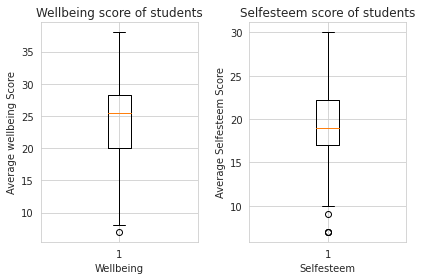

In [110]:
import matplotlib  
import matplotlib.pyplot as plt

well_data = psych_data["Wellbeing"]
est_data = psych_data["selfesteem"]

bp1 = plt.boxplot(well_data)
outliers = [flier.get_ydata() for flier in bp1["fliers"]]
medians = [round(median.get_ydata()[0],1) for median in bp1["medians"]]
min = [round(item.get_ydata()[0], 1) for item in bp1['caps']][::2]
max = [round(item.get_ydata()[0], 1) for item in bp1['caps']][::2]

#medians = [round(item.get_ydata()[0], 1) for item in bp1['medians']]
#means = [round(item.get_ydata()[0], 1) for item in bp1['means']]

print("Wellbeing Outliers: ", outliers)
print("Wellbeing Medians: ", medians)
print("Wellbeing (min, max): ", min, max)

bp2 = plt.boxplot(est_data)
outliers1 = [flier.get_ydata() for flier in bp2["fliers"]]
medians1 = [round(median.get_ydata()[0],1) for median in bp2["medians"]]
min1 = [round(item.get_ydata()[0], 1) for item in bp2['caps']][::2]
max1 = [round(item.get_ydata()[0], 1) for item in bp2['caps']][1::2]

print("Selfesteem Outliers: ", outliers1)
print("Selfesteem Medians: ", medians1)
print("Selfesteem (min, max): ", min1, max1)

plt.subplot(1, 2, 1)
plt.boxplot(well_data)
plt.xlabel("Wellbeing")
plt.ylabel("Average wellbeing Score")
plt.title("Wellbeing score of students")


plt.subplot(1, 2, 2)
plt.boxplot(est_data)
plt.xlabel("Selfesteem")
plt.ylabel("Average Selfesteem Score")
plt.title("Selfesteem score of students")

plt.tight_layout()

plt.show()


There is one outlier point at 7 in wellbeing score which is close to the minimum point 8. There are two outliers at 7 and 9 for selfesteem score while the minimum data point is 10. These are results based on matlib plots. There is a better way of doing this using pandas.

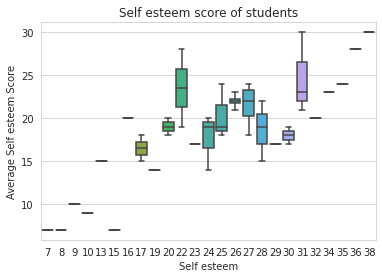

In [68]:
import seaborn as sns

chart = sns.boxplot(x = 'Wellbeing', y= 'selfesteem', data= psych_data)
chart.set_xlabel("Self esteem")
chart.set_ylabel("Average Self esteem Score")
chart.set_title("Self esteem score of students")
sns.set_style("whitegrid")

### Exercise 3 - Removing outliers
---
Create a function called `remove_outliers(df, column)` to remove outliers from a given column in a given dataframe.  Use the function to remove outliers from the `Wellbeing` column.  Then use the function to remove the outliers from the `selfesteem` columns. 

The function will:

1. Store the values for Q1 and Q3 in 2 separate variables   *Hint: you can use `.quantile(0.75)` and `.quantile(0.25)` to get Q3 and Q1 respectively*  
2. Calculate the interquartile range(IQR) using `Q3` - `Q1`  
3. Create a variable which will store the value for the `upper_limit` (`Q3 + 1.5 * IQR`)  
4. Create another variable which assigns the value for the `lower_limit` (`Q1  - 1.5 * IQR`)  
5. Filter all rows where values are NOT outliers into a new dataframe called `df_normal`
6. Return `df_normal`

Run the function twice, once for each column.
Show the info for the resulting dataframe

**Test output**:  
```
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 43
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          41 non-null     int64  
 1   English      41 non-null     object 
 2   sex          41 non-null     object 
 3   origin       41 non-null     object 
 4   Ukresidence  41 non-null     float64
 5   MAAS         41 non-null     float64
 6   Resilliance  41 non-null     int64  
 7   Wellbeing    41 non-null     int64  
 8   Stress       41 non-null     int64  
 9   selfesteem   41 non-null     int64  
 10  LoC          41 non-null     int64  
 11  sleep        41 non-null     int64  
 12  Year         41 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 4.5+ KB
```


In [121]:
def remove_outliers(df, column):
  q1 = df[column].quantile(0.75)
  q3 = df[column].quantile(0.25)
  iqr = q3-q1
  upper_limit = q3 + 1.5*iqr
  lower_limit = q1 - 1.5*iqr
  df_normal = df[(df[column]<lower_limit) & (df[column]>upper_limit)]
  return df_normal

well_norm = remove_outliers(psych_data, "Wellbeing")
est_norm = remove_outliers(psych_data, "selfesteem")


### Exercise 4 - Checking for normality
---

Linear regressions assume that the data is normally distributed (Gaussian) and therefore has the bell curved shape and a similar mean and median (this would be true if the mean was centred like it is in Gaussian data). 

1. Use Seaborn's **distplot** to check the shape of the `Wellbeing` and `selfesteem` columns.  Do they look normally distributed (Gaussian)?

`sns.distplot(dataframe['column'])`

*Hint: if you add, `bins= ...` as a parameter, you can set the number of bins (bars) in your chart*

2. Compare the mean and median of `Wellbeing` - are they similar? 
3. Compare the mean and median of `selfesteem` - are they similar?





/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


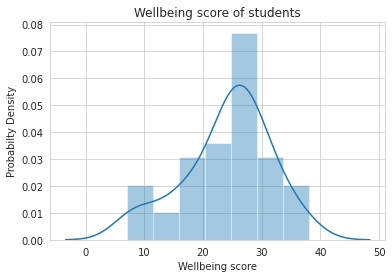

In [130]:

chart = sns.distplot(psych_data['Wellbeing'])
chart.set_xlabel("Wellbeing score")
chart.set_ylabel("Probabilty Density")
chart.set_title("Wellbeing score of students")
sns.set_style("whitegrid")


The wellbeing score definetely is skewed and likely has a smaller peak on the lower score, but, generally follows normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


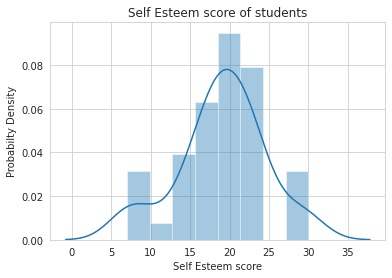

In [131]:
chart = sns.distplot(psych_data['selfesteem'])
chart.set_xlabel("Self Esteem score")
chart.set_ylabel("Probabilty Density")
chart.set_title("Self Esteem score of students")
sns.set_style("whitegrid")

The wellbeing score definetely is skewed and has a smaller peak on the lower score, but, generally follows normal distribution.

### Exercise 5 - Check which variables are most highly correlated
---
Using the `dataframe.corr()` function and Seaborn's heatmap, create a correlation heatmap matrix to check which variables are most highly correlated.

A correlation matrix finds the correlation coefficient between every variable pair combination in a set of variables.  A correlation heatmap shows the degree of correlation between variables using a colour scale.

*The matrix and heatmap will always show the correlation coefficients between each variable and itself, which will have a correlation coefficient of 1.*
  
Values closest to 1 mean the variables are positively correlated with each other with 1 meaning 100% correlated


Values close to -1 mean the variables are negatively correlated with each other with -1 meaning 100% negatively correlated

1. create the correlation matrix assigning it to a variable called **correlation_matrix** using the .corr() function and rounding to 2 decimal places:

  `correlation_matrix = dataframe.corr().round(2)`

*This will create a matrix similar to the linear regression matrix created in the numpy worksheet, but with more than two variables.*

2. create a heatmap of the correlation matrix using:

 `sns.heatmap(data=data_variable, annot=True)`

*Hint: Use `annot = True` to print the correlation values inside the square*

3. Which variables are the most highly correlated with each other (closest to 1 or -1)?

### Exercise 6 - Linear regression 
---
Using the `linregress` function, perform a linear regression on the Wellbeing and selfesteem columns   
To do this:

1. `from scipy.stats import linregress`
2. create a variable 'x' which stores the Wellbeing column
3. create a variable 'y' which stores the selfesteem column
4. create a variable called regression and assign the result of running the linregress function with x, y as its parameters ( linregress(x,y) )
5. display the regression
6. display the slope (regression.slope)
7. display the y-intercept
8. display the r^2 value (rvalue**2)
9. display the pvalue 


### Exercise 7 - understanding the output 
---
The r^2 value (rvalue**2) helps us understand how much our independent variable (x) is predicting our dependent variable (y). The closer to 1 the rvalue is the more  the change in Y is explained by X. So an rvalue of 0.7 means that 70% of Y's variance can be explained by X. 

Our pvalue shows how significant our model is, if the pvalue is < 0.05 then the model is significant. 

On this basis, write below the findings of the above regression.
* is the model significant?
* how much is the change in y explained by x? 

**Write about the findings here**: 

### Exercise 8 - Linear regression with other variables 
---

Referring back to the correlation heatmap..  
*  Repeat Exercise 6 but with the variables that were the most highly correlated according to the heatmap.   
* write a comment comparing the results of this regression with the one you created in exercise 6

**Comment here**: 

### Exercise 9 - Plotting a line of best fit 
---
To create a line of best fit we use y = slope\*x + intercept. 

Using matplotlib (dont forget to import it):

* create a scatter graph between Wellbeing and selfesteem 
* plot a line of best fit using the results in exercise 6  (y = slope * x + intercept)  

### Exercise 10 - using Seaborn to plot a regression line 
---

Use Seaborn's `regplot` function to create a scatter graph with line of best fit of the variables you used in Exercise 8.

* Compare the 'Wellbeing' and 'selfesteem' graph to the graph you created in Exercise 9